In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import re
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def to_num(s):
    try:
        return int(s)
    except ValueError:
        try:
            return float(s)
        except ValueError:
            return s

In [3]:
res_cy = []
with open('chaoyang.log', 'r') as lines:
    numRows = 0
    tmp = []
    for line in lines:
        if line.strip() != '---':
            if len((line.strip().split(':'))[1].strip()):
                tmp.append(to_num((line.strip().split(':'))[1].strip()))
        else:
            res_cy.append(tmp)
            tmp = []

In [2]:
res2 = []
with open('test2.log', 'r') as lines:
    numRows = 0
    tmp = []
    for line in lines:
        if line.strip() != '---':
            if len((line.strip().split(':'))[1].strip()):
                tmp.append(to_num((line.strip().split(':'))[1].strip()))
        else:
            res2.append(tmp)
            tmp = []

KeyboardInterrupt: 

In [4]:
cols = ['seq', 'secs', 'nsecs', 'frame_id', 'utm_east', 'utm_north',
       'utm_up', 'roll', 'pitch', 'yaw', 'velo_north',
       'velo_east', 'velo_down', 'velo_robot_x',
       'velo_robot_y', 'velo_robot_z', 'acc_robot_x',
       'acc_robot_y', 'acc_robot_z', 'omega_yaw', 'omega_pitch',
       'omega_roll', 'nav_mode', 'pos_mode', 'vel_mode']

df2 = pd.DataFrame(res2, columns=cols)
df2 = df2.drop(columns = ['seq', 'frame_id'])

In [4]:
res3 = []
with open('test3.log', 'r') as lines:
    numRows = 0
    tmp = []
    for line in lines:
        if line.strip() != '---':
            if len((line.strip().split(':'))[1].strip()):
                tmp.append(to_num((line.strip().split(':'))[1].strip()))
        else:
            res3.append(tmp)
            tmp = []

IndexError: list index out of range

In [5]:
df3 = pd.DataFrame(res3, columns=cols)
df3 = df3.drop(columns = ['seq', 'frame_id'])

In [6]:
res4 = []
with open('test4.log', 'r') as lines:
    numRows = 0
    tmp = []
    for line in lines:
        if line.strip() != '---':
            if len((line.strip().split(':'))[1].strip()):
                tmp.append(to_num((line.strip().split(':'))[1].strip()))
        else:
            res4.append(tmp)
            tmp = []

In [7]:
df4 = pd.DataFrame(res4, columns=cols)
df4 = df4.drop(columns = ['seq', 'frame_id'])

In [9]:
def pre_pitch(pitch):
    """Preprocess pitch: erase bias"""
    
    pitch2 = pitch.copy()
    pitch2[pitch>np.pi] = 2*np.pi - pitch[pitch>np.pi]
    pitch2[pitch<=np.pi] = - pitch[pitch<=np.pi]
    shift = 0.04 # approximate shift
    pitch2 = pitch2 - shift
    return pitch2

In [10]:
# Moving Average
def MA(seq, w):
    """
    Moving average
    seq: sequence; w: window size
    """
    out0 = np.convolve(seq,np.ones(w,dtype=int),'valid')/w
    r = np.arange(1,w-1,2)
    start = np.cumsum(seq[:w-1])[::2]/r
    stop = (np.cumsum(seq[:-w:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

In [133]:
# thresholding function
def TH(x, th):
    """
    thresholding function
    th is the relative threshold, ratio to the largest abs value
    """
    
    x_n = x/np.abs(x).max()
    res = x_n.copy()
    res[np.abs(res)<th] = 0
    return res

def shrink1(x, scale=0.01, mode=''):
    """
    """
    
    res = np.sign(x)*np.sqrt(np.abs(x))
#     res = np.sign(x)*np.abs(x)/(np.abs(x)+1)
    res *= scale
    
    return res

def shrink2(x, scale = 0.01):
    """
    """
    
#     res = np.sign(x)*np.sqrt(np.abs(x))
    res = np.sign(x)*np.abs(x)/(np.abs(x)+1)
    res *= scale
    
    return res

def shrink3(x, scale = 0.01):
    """
    """
    
#     res = np.sign(x)*np.sqrt(np.abs(x))
    res = np.exp(x)/(np.exp(x)+1) - 1/2
    res *= scale
    
    return res

def shrink4(x, scale = 0.01):
    """
    """
    
#     res = np.sign(x)*np.sqrt(np.abs(x))
    res = np.tanh(x)
    res *= scale
    
    return res

In [130]:
np.tanh(xx)

array([-0.76159416, -0.7573409 , -0.75302239, -0.74863803, -0.7441872 ,
       -0.73966928, -0.7350837 , -0.73042985, -0.72570718, -0.72091511,
       -0.7160531 , -0.7111206 , -0.7061171 , -0.70104207, -0.69589503,
       -0.69067548, -0.68538297, -0.68001704, -0.67457726, -0.66906322,
       -0.66347453, -0.65781081, -0.6520717 , -0.64625688, -0.64036604,
       -0.63439887, -0.62835514, -0.62223458, -0.616037  , -0.60976219,
       -0.60341001, -0.59698032, -0.59047301, -0.583888  , -0.57722526,
       -0.57048477, -0.56366654, -0.55677062, -0.54979709, -0.54274608,
       -0.53561772, -0.5284122 , -0.52112974, -0.51377061, -0.50633508,
       -0.49882349, -0.49123621, -0.48357364, -0.47583623, -0.46802447,
       -0.46013887, -0.45217999, -0.44414846, -0.4360449 , -0.42787   ,
       -0.4196245 , -0.41130915, -0.40292478, -0.39447222, -0.38595239,
       -0.3773662 , -0.36871463, -0.35999871, -0.3512195 , -0.34237808,
       -0.33347562, -0.32451328, -0.31549229, -0.30641391, -0.29

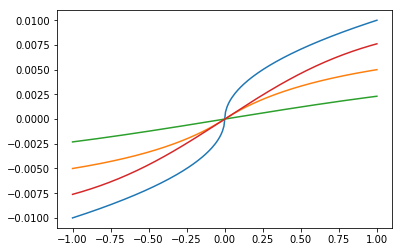

In [132]:
xx = np.linspace(-1,1 ,200)
plt.plot(xx, shrink1(xx))
plt.plot(xx, shrink2(xx))
plt.plot(xx, shrink3(xx))
plt.plot(xx, np.tanh(xx)/100)

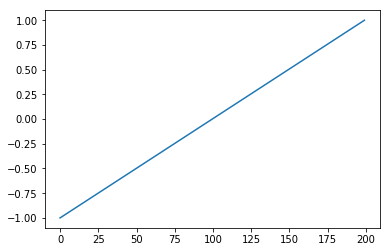

In [76]:
xx = np.linspace(-1,1 ,200)
plt.plot(xx)

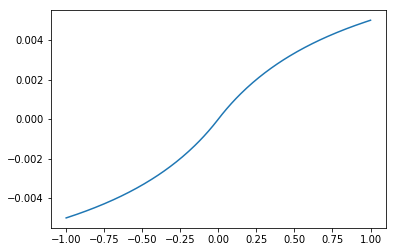

In [73]:
xx = np.linspace(-1,1 ,200)
plt.plot(xx, shrink(xx))

In [134]:
def bias(acc, ma_size = 101, th = 0.1, scale =0.01):
    """
    
    """
    
    acc_ = MA(acc, ma_size)
    acc_ = TH(acc_, th)
    acc_ = shrink4(acc_, scale)
    return acc_

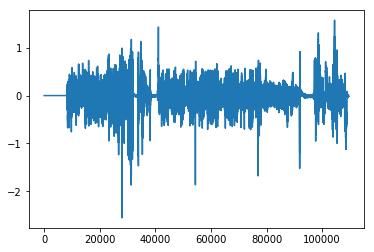

In [70]:
plt.plot(df2.acc_robot_x)

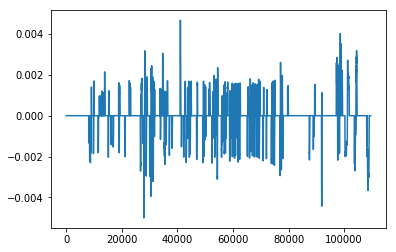

In [127]:
plt.plot(bias(df2.acc_robot_x))

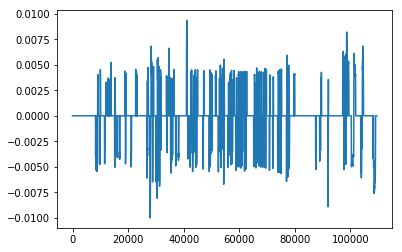

In [69]:
plt.plot(bias(df2.acc_robot_x))

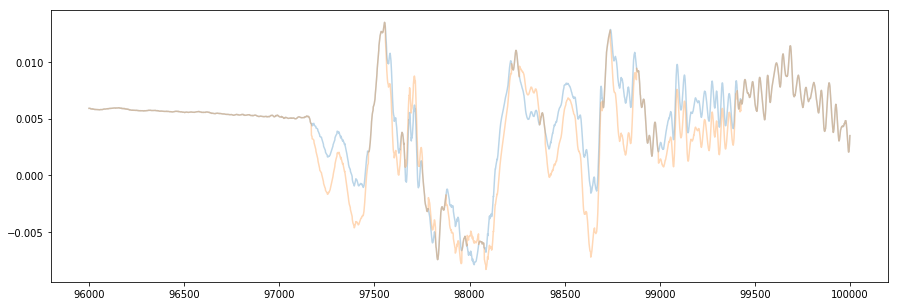

In [135]:
idx = np.array(list(range(96000,100000)))
plt.figure(figsize=(15,5))
plt.plot(np.sin(df2.pitch)[idx], alpha=0.3)
plt.plot((np.sin(df2.pitch)-bias(df2.acc_robot_x))[idx], alpha=0.3)

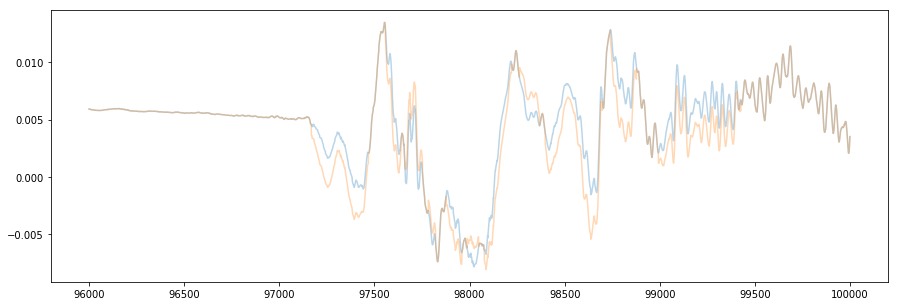

In [26]:
idx = np.array(list(range(96000,100000)))
plt.figure(figsize=(15,5))
plt.plot(np.sin(df2.pitch)[idx], alpha=0.3)
plt.plot((np.sin(df2.pitch)-bias(df2.acc_robot_x))[idx], alpha=0.3)

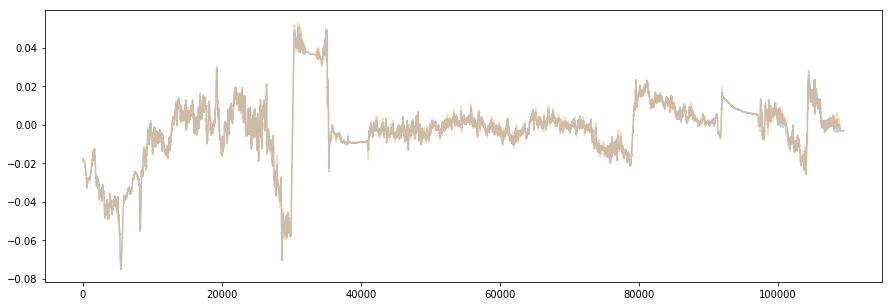

In [27]:
plt.figure(figsize=(15,5))
plt.plot(np.sin(df2.pitch), alpha=0.3)
plt.plot((np.sin(df2.pitch)-bias(df2.acc_robot_x)), alpha=0.3)

In [29]:
pitch2_s = np.sin(df2.pitch) - bias(df2.acc_robot_x)

In [30]:
from scipy.ndimage import gaussian_filter1d

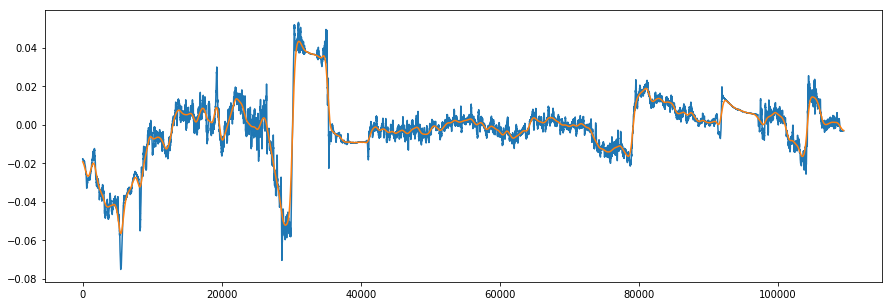

In [56]:
plt.figure(figsize=(15,5))
plt.plot(pitch2_s)
plt.plot(gaussian_filter1d(pitch2_s, 300, mode = 'nearest', truncate=100))


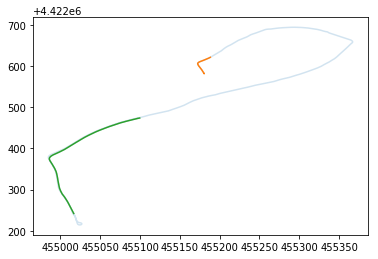

In [46]:
plt.plot(df2.utm_east, df2.utm_north, alpha=0.2)
plt.plot(df2.utm_east[:10000], df2.utm_north[:10000])
plt.plot(df2.utm_east[-10000:], df2.utm_north[-10000:])

In [10]:
pitch2 = pre_pitch(df2.pitch)
pitch3 = pre_pitch(df3.pitch)
pitch4 = pre_pitch(df4.pitch)
x2 = df2.utm_east
x3 = df3.utm_east
x4 = df4.utm_east
y2 = df2.utm_north
y3 = df3.utm_north
y4 = df4.utm_north
z2 = df2.utm_up
z3 = df3.utm_up
z4 = df4.utm_up
acc2 = df2.acc_robot_x
acc3 = df3.acc_robot_x
acc4 = df4.acc_robot_x

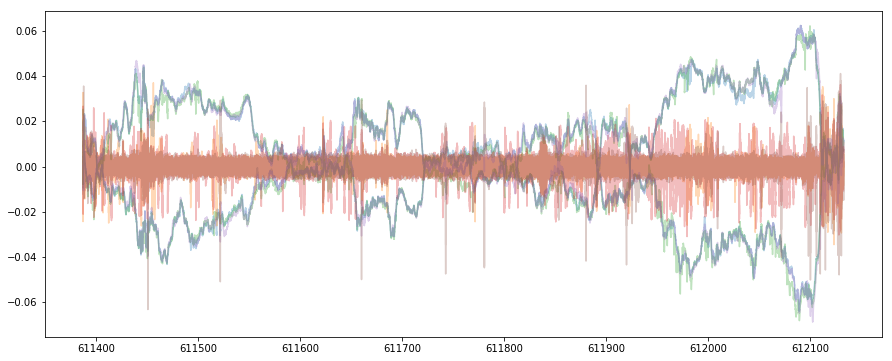

In [12]:
plt.figure(figsize=(15,6))
plt.plot(x2, pitch2, alpha=0.3)
plt.plot(x2, acc2/50, alpha=0.3)
plt.plot(x3, pitch3, alpha=0.3)
plt.plot(x3, acc3/50, alpha=0.3)
plt.plot(x4, pitch4, alpha=0.3)
plt.plot(x4, acc4/50, alpha=0.3)

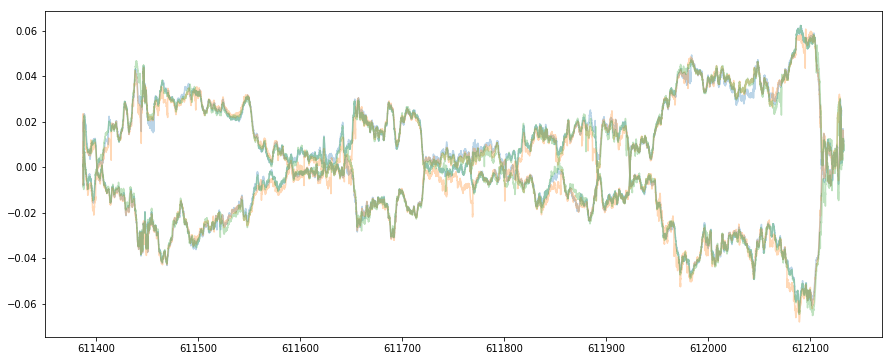

In [137]:
plt.figure(figsize=(15,6))
plt.plot(x2, pitch2-bias(acc2), alpha=0.3)
plt.plot(x3, pitch3-bias(acc3), alpha=0.3)
plt.plot(x4, pitch4-bias(acc4), alpha=0.3)

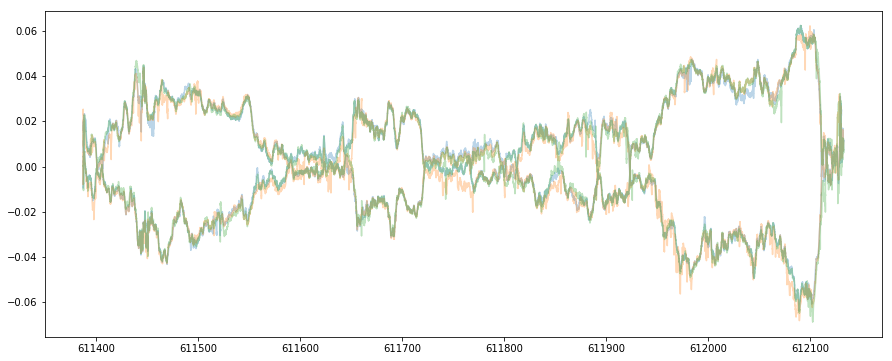

In [134]:
plt.figure(figsize=(15,6))
plt.plot(x2, pitch2, alpha=0.3)
plt.plot(x3, pitch3, alpha=0.3)
plt.plot(x4, pitch4, alpha=0.3)

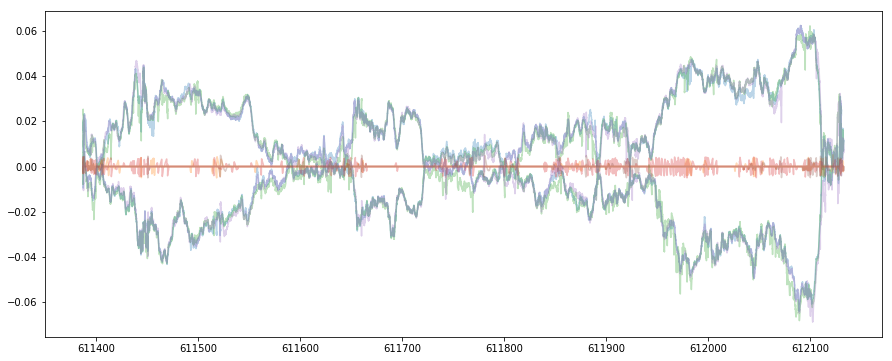

In [133]:
plt.figure(figsize=(15,6))
plt.plot(x2, pitch2, alpha=0.3)
plt.plot(x2, bias(acc2), alpha=0.3)
plt.plot(x3, pitch3, alpha=0.3)
plt.plot(x3, bias(acc3), alpha=0.3)
plt.plot(x4, pitch4, alpha=0.3)
plt.plot(x4, bias(acc4), alpha=0.3)

In [29]:
loc = np.array(list(range(180000, 190000)))
loc2 = np.array(list(range(160000, 220000)))

In [93]:
acc2_s = MA(acc2, 101)
acc4_s = MA(acc4, 101)

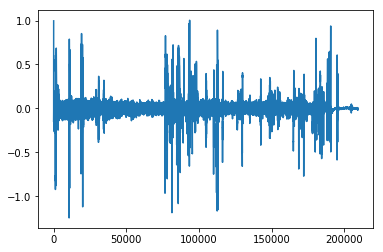

In [89]:
plt.plot(acc2_s)

In [125]:
loc = np.array(list(range(160000, 170000)))
loc2 = np.array(list(range(190000, 200000)))

In [94]:
plt.figure(figsize=(15,9))
# plt.plot(x2[loc], pitch2[loc], alpha=0.3, c='b', label = '2')
# plt.plot(x2[loc], pitch2[loc]-bias(acc2)[loc], alpha=0.3, c='b', label = '2')
# plt.plot(x2[loc], shrink(TH(acc2_s,0.1))[loc], alpha=0.3, c='y', label = '2')
# plt.plot(x2[loc], bias(acc2)[loc], alpha=0.3, c='y', label = '2')
plt.plot(x3[loc2], bias(acc3)[loc2])
plt.plot(x3[loc2], pitch3[loc2], alpha=0.3, c='y', label = '3')
plt.plot(x3[loc2], pitch3[loc2]-bias(acc3)[loc2], c='g', label = '3')
plt.plot(x4[loc], pitch4[loc][loc], alpha=0.3, c='r', label = '4')
plt.plot(x4[loc], shrink(TH(acc4_s,0.1))[loc], alpha=0.3, c='g', label = '4')
plt.legend()

NameError: name 'x3' is not defined

<Figure size 1080x648 with 0 Axes>

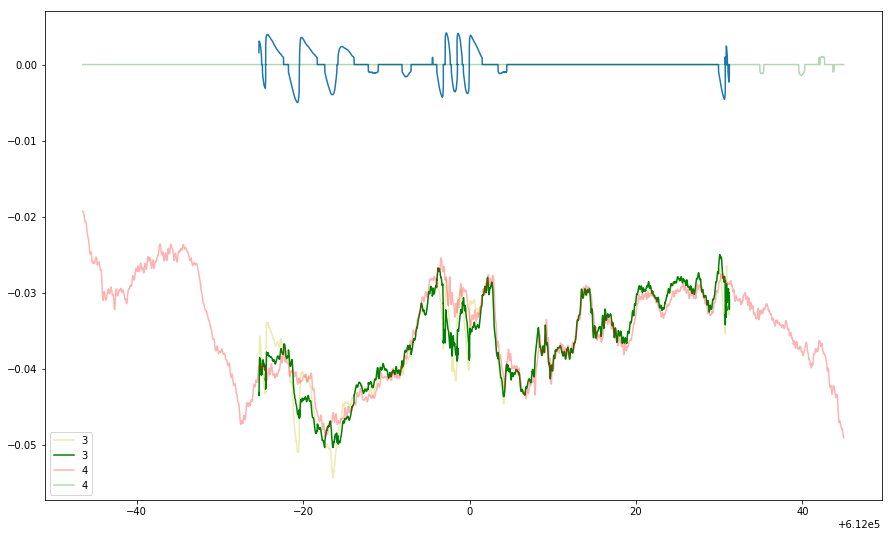

In [132]:
plt.figure(figsize=(15,9))
# plt.plot(x2[loc], pitch2[loc], alpha=0.3, c='b', label = '2')
# plt.plot(x2[loc], pitch2[loc]-bias(acc2)[loc], alpha=0.3, c='b', label = '2')
# plt.plot(x2[loc], shrink(TH(acc2_s,0.1))[loc], alpha=0.3, c='y', label = '2')
# plt.plot(x2[loc], bias(acc2)[loc], alpha=0.3, c='y', label = '2')
plt.plot(x3[loc2], bias(acc3)[loc2])
plt.plot(x3[loc2], pitch3[loc2], alpha=0.3, c='y', label = '3')
plt.plot(x3[loc2], pitch3[loc2]-bias(acc3)[loc2], c='g', label = '3')
plt.plot(x4[loc], pitch4[loc][loc], alpha=0.3, c='r', label = '4')
plt.plot(x4[loc], shrink(TH(acc4_s,0.1))[loc], alpha=0.3, c='g', label = '4')
plt.legend()

In [43]:
from scipy.ndimage import gaussian_filter1d

In [112]:
acc_d = gaussian_filter1d(acc3, 50)

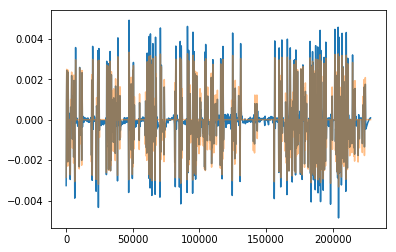

In [15]:
# filter noise in acc
acc0 = gaussian_filter1d(acc3, 100, mode='nearest')
plt.plot(acc0/100)
# use thresholding to choose the bumper places
bias = TH(acc0, 0.1)
# bias = TH(acc, 0.2)
# shrink the effects of bumper
bias = shrink(bias)
plt.plot(bias, alpha=0.5)

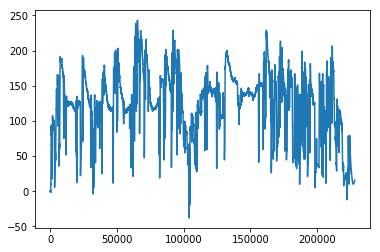

In [120]:
acc_c = acc3.cumsum()
plt.plot(acc_c)

In [16]:
plt.figure(figsize=(15,9))
plt.plot(x3[loc2], pitch3[loc2], alpha=0.4, label = '3')
plt.plot(x3[loc2], pitch3[loc2]+acc_c[loc2]/10000-0.011, alpha=0.4, label = '3')
plt.plot(x3[loc2], pitch3[loc2]+df3.velo_robot_x[loc2]/100-0.01, alpha=0.4, label = '3')
plt.plot(x3[loc2], acc_c[loc2]/10000-0.01, alpha=0.4, label = '3')

NameError: name 'loc2' is not defined

<Figure size 1080x648 with 0 Axes>

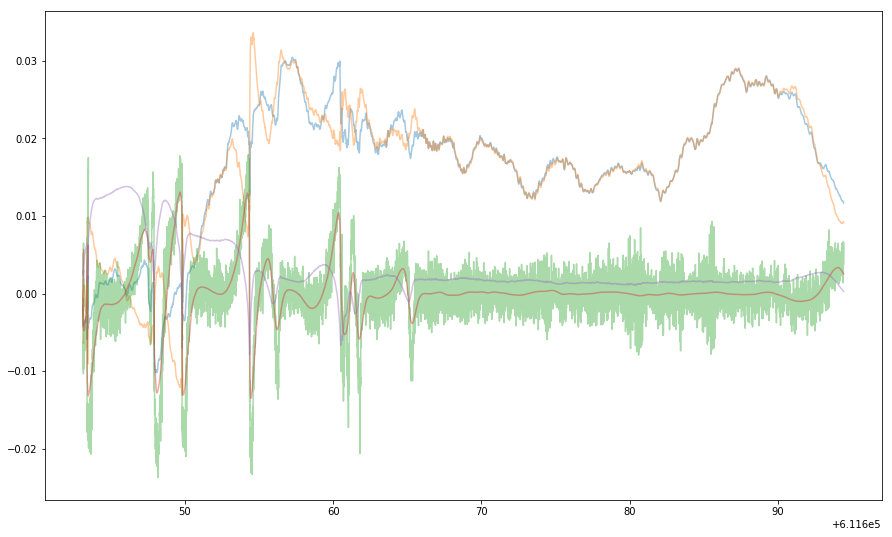

In [211]:
plt.figure(figsize=(15,9))
plt.plot(x3[loc2], pitch3[loc2], alpha=0.4, label = '3')
plt.plot(x3[loc2], pitch3[loc2]-acc_d[loc2]/50, alpha=0.4, label = '3')
plt.plot(x3[loc2], acc3[loc2]/50, alpha=0.4, label = '3')
plt.plot(x3[loc2], acc_d[loc2]/50, alpha=0.4, label = '3')
plt.plot(x3[loc2], acc_c[loc2]/10000-0.01, alpha=0.4, label = '3')

In [151]:
l = np.array([0.4,0.44,0.45,0.55,0.6,0.7,0.9,1.9])

In [167]:
np.median(l)

0.575

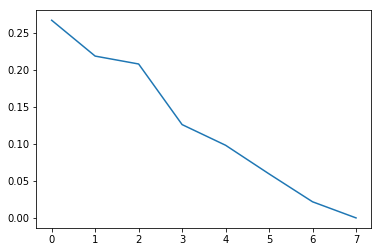

In [170]:
plt.plot(w/w.sum())

In [178]:
np.mean(l)

0.7424999999999999

In [182]:
w = np.exp(-10000*abs(l-np.median(l)))
sum(w/w.sum()*l)

0.5749999999999862

In [163]:
sum(w/w.sum())

1.0

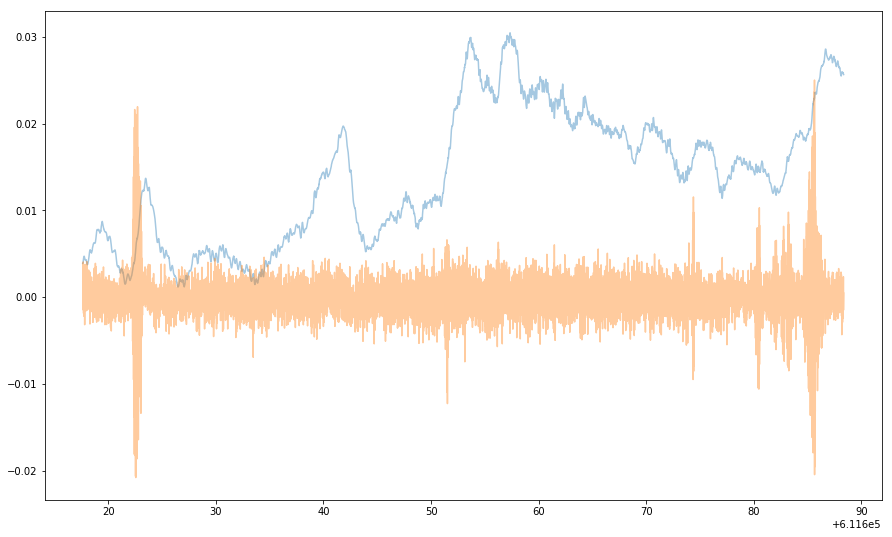

In [189]:
loc = list(range(49000,60000))
loc2 = list(range(55000, 65000))
plt.figure(figsize=(15,9))
plt.plot(x2[loc], pitch2[loc], alpha=0.4, label = '2')
plt.plot(x2[loc], acc2[loc]/50, alpha=0.4, label = '2')

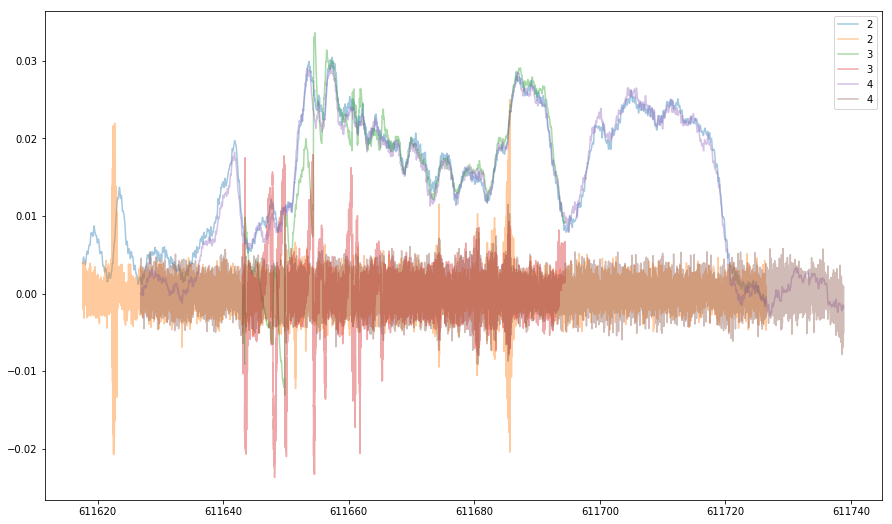

In [200]:
loc = np.array(list(range(45000,60000)))
loc2 = np.array(list(range(55000, 65000)))
plt.figure(figsize=(15,9))
plt.plot(x2[loc], pitch2[loc], alpha=0.4, label = '2')
plt.plot(x2[loc], acc2[loc]/50, alpha=0.4, label = '2')
# plt.plot(x3[loc2], pitch3[loc2], alpha=0.4, label = '3')
plt.plot(x3[loc2], pitch3[loc2]-acc_d[loc2]/50, alpha=0.4, label = '3')
plt.plot(x3[loc2], acc3[loc2]/50, alpha=0.4, label = '3')
plt.plot(x4[loc], pitch4[loc], alpha=0.4, label = '4')
plt.plot(x4[loc], acc4[loc]/50, alpha=0.4, label = '4')
plt.legend()

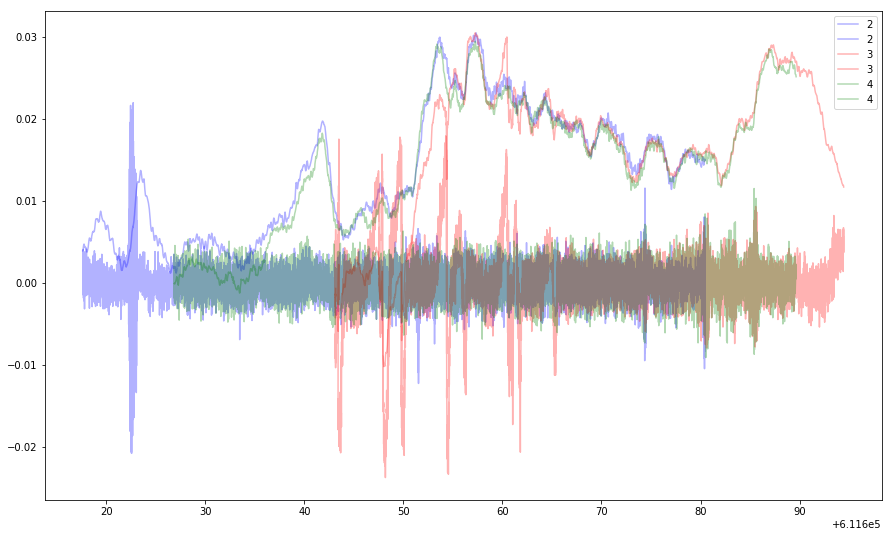

In [88]:
loc = list(range(50000,60000))
loc2 = list(range(55000, 65000))
plt.figure(figsize=(15,9))
plt.plot(x2[loc], pitch2[loc], alpha=0.3, c='b', label = '2')
plt.plot(x2[loc], acc2[loc]/50, alpha=0.3, c='b', label = '2')
plt.plot(x3[loc2], pitch3[loc2], alpha=0.3, c='r', label = '3')
plt.plot(x3[loc2], acc3[loc2]/50, alpha=0.3, c='r', label = '3')
plt.plot(x4[loc], pitch4[loc], alpha=0.3, c='g', label = '4')
plt.plot(x4[loc], acc4[loc]/50, alpha=0.3, c='g', label = '4')
plt.legend()

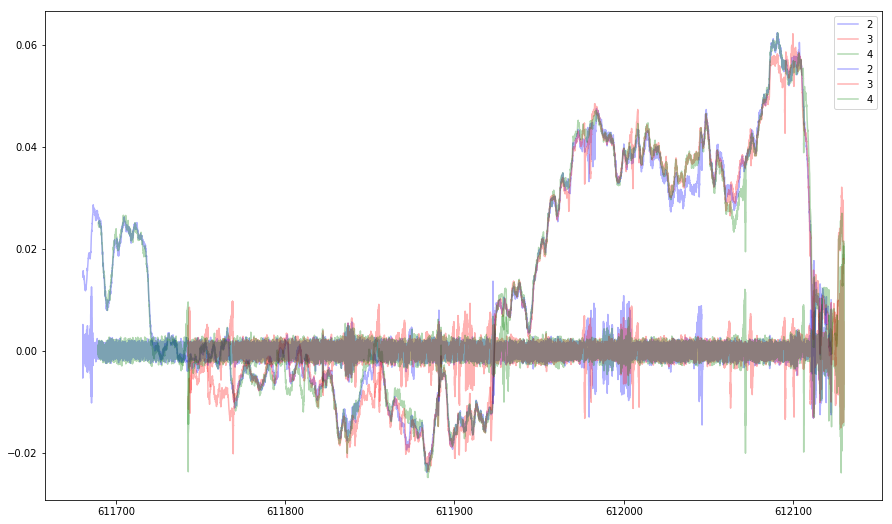

In [216]:
loc = np.array(list(range(50000)))
plt.figure(figsize=(15,9))
plt.plot(x2[loc], pitch2[loc], alpha=0.3, c='b', label = '2')
plt.plot(x3[loc], pitch3[loc], alpha=0.3, c='r', label = '3')
plt.plot(x4[loc], pitch4[loc], alpha=0.3, c='g', label = '4')
plt.plot(x2[loc], acc2[loc]/100, alpha=0.3, c='b', label = '2')
plt.plot(x3[loc], acc3[loc]/100, alpha=0.3, c='r', label = '3')
plt.plot(x4[loc], acc4[loc]/100, alpha=0.3, c='g', label = '4')
plt.legend()

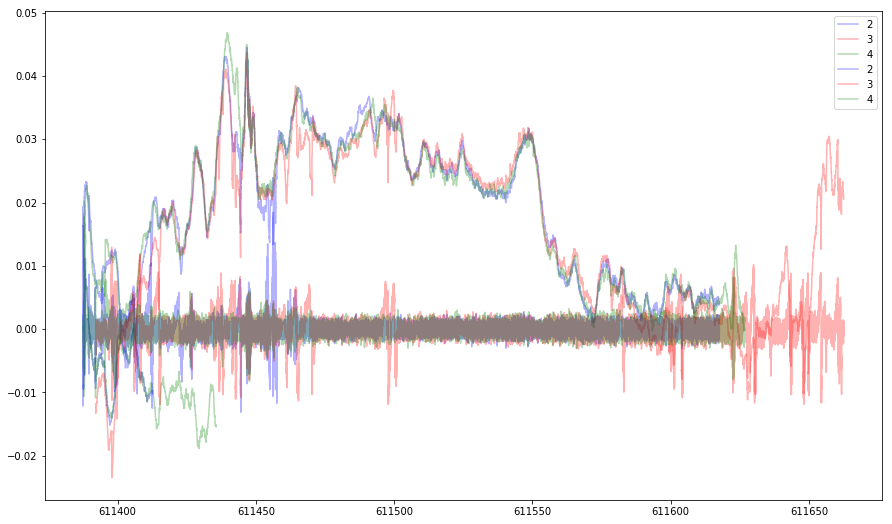

In [219]:
loc = np.array(list(range(60000, 100000)))
# loc = np.array(list(range(50000)))
plt.figure(figsize=(15,9))
plt.plot(x2[loc], pitch2[loc], alpha=0.3, c='b', label = '2')
plt.plot(x3[loc], pitch3[loc], alpha=0.3, c='r', label = '3')
plt.plot(x4[loc], pitch4[loc], alpha=0.3, c='g', label = '4')
plt.plot(x2[loc], acc2[loc]/100, alpha=0.3, c='b', label = '2')
plt.plot(x3[loc], acc3[loc]/100, alpha=0.3, c='r', label = '3')
plt.plot(x4[loc], acc4[loc]/100, alpha=0.3, c='g', label = '4')
plt.legend()

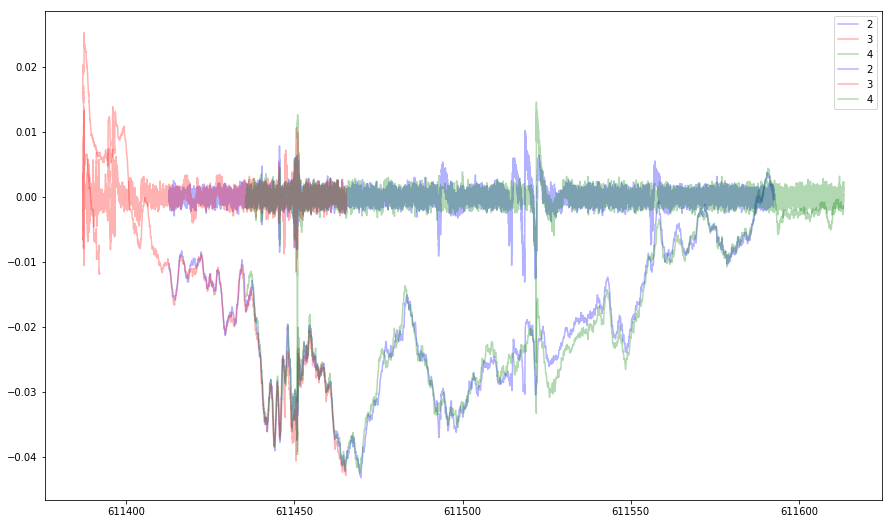

In [222]:
loc = np.array(list(range(100000, 120000)))
# loc = np.array(list(range(50000)))
plt.figure(figsize=(15,9))
plt.plot(x2[loc], pitch2[loc], alpha=0.3, c='b', label = '2')
plt.plot(x3[loc], pitch3[loc], alpha=0.3, c='r', label = '3')
plt.plot(x4[loc], pitch4[loc], alpha=0.3, c='g', label = '4')
plt.plot(x2[loc], acc2[loc]/100, alpha=0.3, c='b', label = '2')
plt.plot(x3[loc], acc3[loc]/100, alpha=0.3, c='r', label = '3')
plt.plot(x4[loc], acc4[loc]/100, alpha=0.3, c='g', label = '4')
plt.legend()

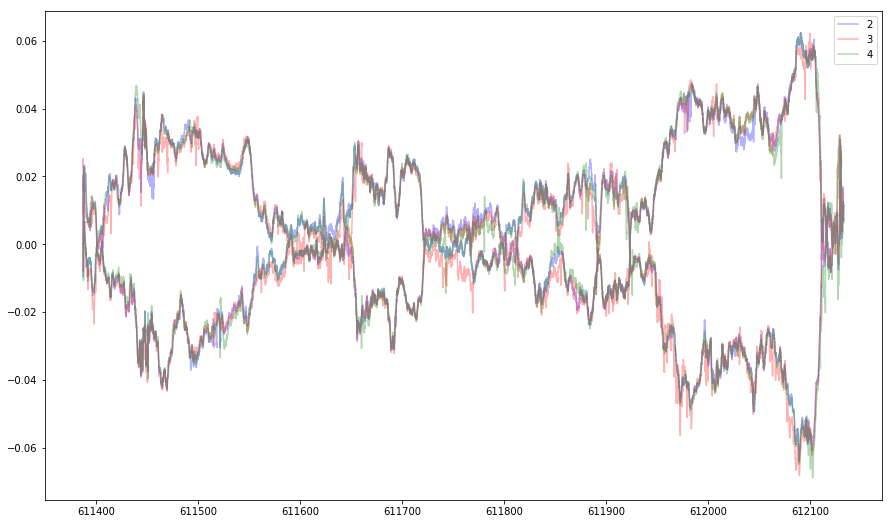

In [212]:
plt.figure(figsize=(15,9))
plt.plot(x2, pitch2, alpha=0.3, c='b', label = '2')
plt.plot(x3, pitch3, alpha=0.3, c='r', label = '3')
plt.plot(x4, pitch4, alpha=0.3, c='g', label = '4')
plt.legend()

In [ ]:
pitch2 = pitch.copy()
pitch2[pitch>np.pi] = 2*np.pi - pitch[pitch>np.pi]
pitch2[pitch<=np.pi] = - pitch[pitch<=np.pi]
shift = 0.04 # approximate shift
pitch2 = pitch2 - shift

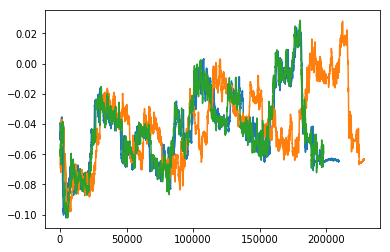

In [14]:
plt.plot(np.sin(df2.pitch))
plt.plot(np.sin(df3.pitch))
plt.plot(np.sin(df4.pitch))

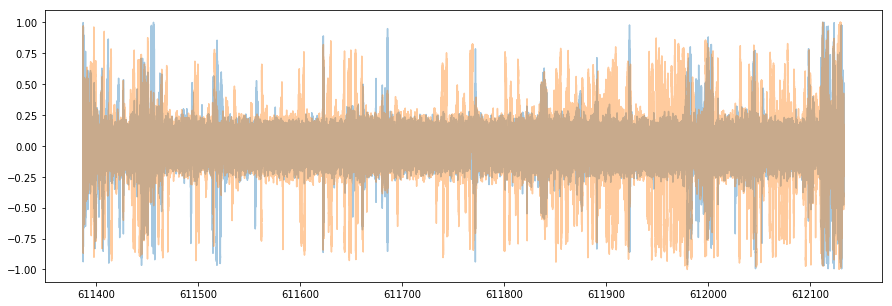

In [46]:
plt.figure(figsize=(15,5))
plt.plot(df0.utm_east, np.sin(df0.acc_robot_x), alpha=0.4)
plt.plot(df.utm_east, np.sin(df.acc_robot_x), alpha=0.4)

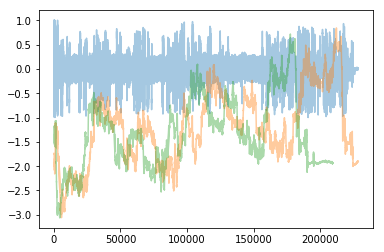

In [103]:
plt.plot(np.sin(df.acc_robot_x), alpha=0.4)
plt.plot(np.sin(df.pitch)*30, alpha=0.4)
plt.plot(np.sin(df0.pitch)*30, alpha=0.4)

In [220]:
x0 = df0.utm_east

In [222]:
nh0=x0.argmin()
nh=x.argmin()

/home/stve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.
/home/stve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


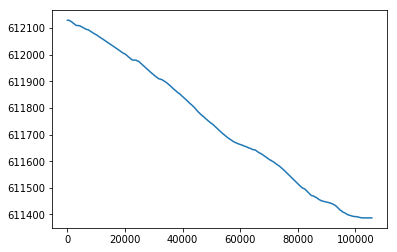

In [143]:
plt.plot(x[:n_h])

In [122]:
len(df0.utm_north[-1000:])

1000

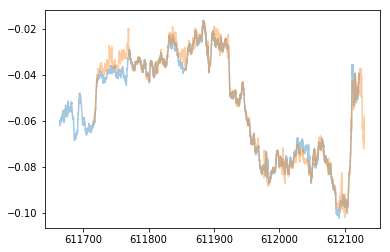

In [148]:
plt.plot(df0.utm_east[:n_h//2], np.sin(df0.pitch)[:n_h//2], alpha=0.4)
plt.plot(df.utm_east[:n_h//2], np.sin(df.pitch)[:n_h//2], alpha=0.4)

# Bias of pitch and acc

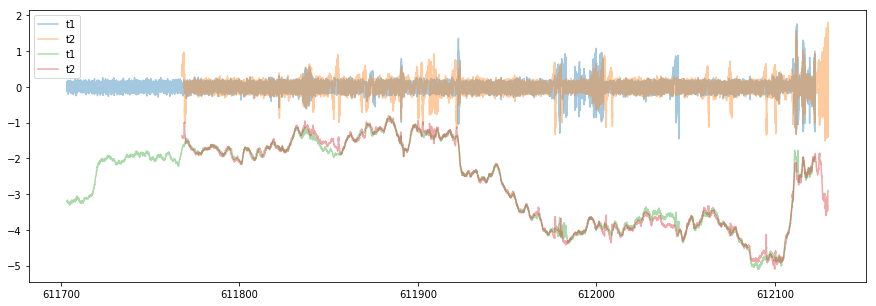

In [238]:
plt.figure(figsize=(15,5))
plt.plot(df0.utm_east[:n_h//2], df0.acc_robot_x[:n_h//2], alpha=0.4, label = 't1')
plt.plot(df.utm_east[:n_h//2], df.acc_robot_x[:n_h//2], alpha=0.4, label='t2')
plt.plot(df0.utm_east[:n_h//2], np.sin(df0.pitch)[:n_h//2]*50, alpha=0.4, label='t1')
plt.plot(df.utm_east[:n_h//2], np.sin(df.pitch)[:n_h//2]*50, alpha=0.4, label = 't2')
plt.legend()

In [236]:
nh

105733

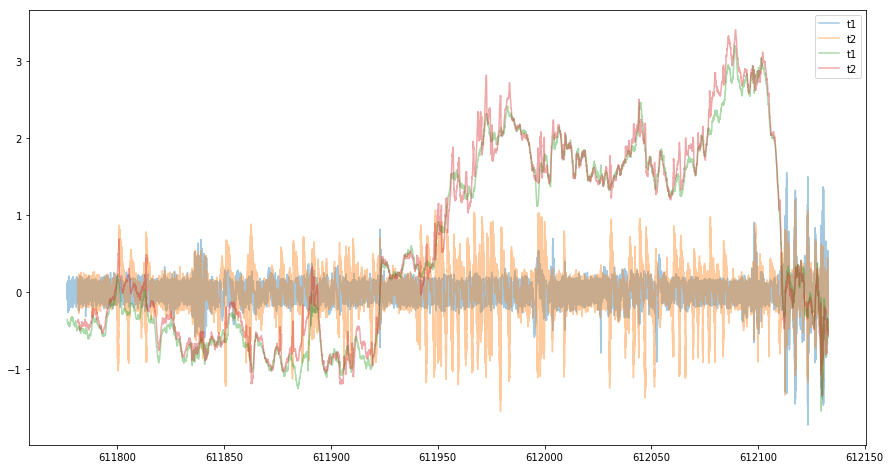

In [251]:
plt.figure(figsize=(15,8))
plt.plot(df0.utm_east[nh//2+90000:], df0.acc_robot_x[nh//2+90000:], alpha=0.4, label = 't1')
plt.plot(df.utm_east[nh//2+105000:], df.acc_robot_x[nh//2+105000:], alpha=0.4, label='t2')
plt.plot(df0.utm_east[nh//2+90000:], np.sin(df0.pitch)[nh//2+90000:]*50+2, alpha=0.4, label='t1')
plt.plot(df.utm_east[nh//2+105000:], np.sin(df.pitch)[nh//2+105000:]*50+2, alpha=0.4, label = 't2')
plt.legend()

In [274]:
acc_d = acc.diff(100)
acc_d[:100]=0
acc_d

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         0.000000
8         0.000000
9         0.000000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
19        0.000000
20        0.000000
21        0.000000
22        0.000000
23        0.000000
24        0.000000
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        0.000000
            ...   
228365   -0.000008
228366   -0.000145
228367    0.000250
228368   -0.000122
228369    0.000166
228370   -0.000082
228371    0.000090
228372    0.000154
228373    0.000004
228374    0.000010
228375   -0.000206
228376    0.000132
228377   -0.000449
228378   -0.000156
228379   -0.000032
228380   -0.000201
228381   -0.000260
228382    0.000168
228383    0.000112
228384    0.000260
228385    0.000250
228386   -0.

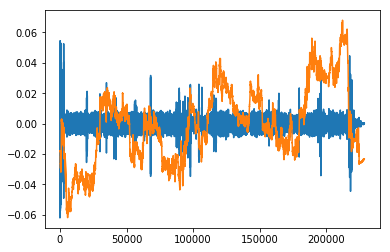

In [266]:
plt.plot(acc.diff())
plt.plot(pitch)

In [296]:
from scipy.ndimage.filters import gaussian_filter1d

In [319]:
acc = gaussian_filter1d(acc_d, 20) *10

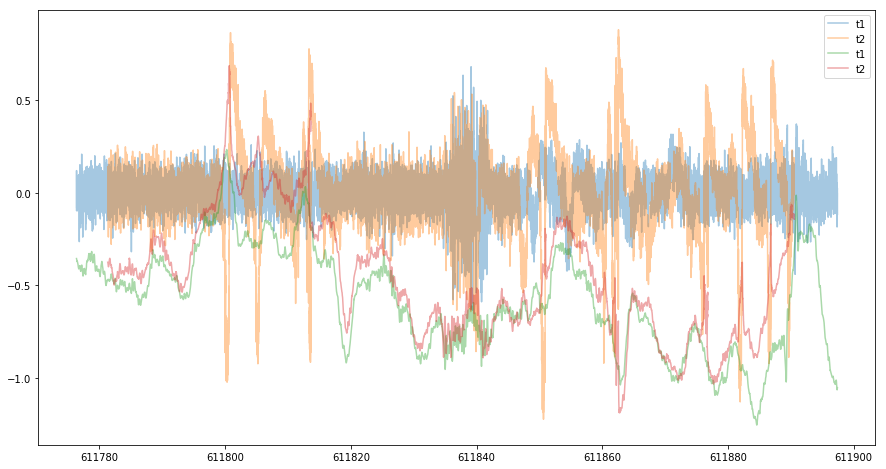

In [321]:
plt.figure(figsize=(15,8))
plt.plot(df0.utm_east[nh//2+90000:nh//2+90000+12000], df0.acc_robot_x[nh//2+90000:nh//2+90000+12000], alpha=0.4, label = 't1')
plt.plot(df.utm_east[nh//2+105000:nh//2+90000+30000], df.acc_robot_x[nh//2+105000:nh//2+90000+30000], alpha=0.4, label='t2')
plt.plot(df0.utm_east[nh//2+90000:nh//2+90000+12000], np.sin(df0.pitch)[nh//2+90000:nh//2+90000+12000]*50+2, alpha=0.4, label='t1')
plt.plot(df.utm_east[nh//2+105000:nh//2+90000+30000], np.sin(df.pitch)[nh//2+105000:nh//2+90000+30000]*50+2, alpha=0.4, label = 't2')
plt.legend()

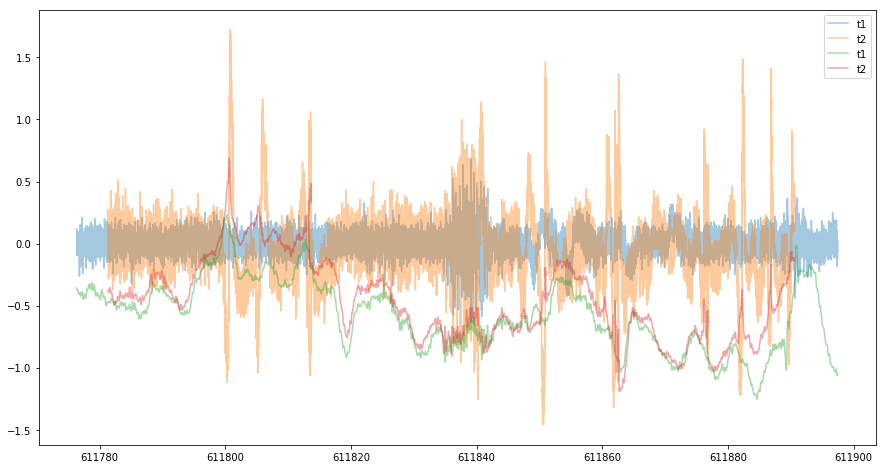

In [277]:
plt.figure(figsize=(15,8))
plt.plot(df0.utm_east[nh//2+90000:nh//2+90000+12000], df0.acc_robot_x[nh//2+90000:nh//2+90000+12000], alpha=0.4, label = 't1')
plt.plot(df.utm_east[nh//2+105000:nh//2+90000+30000], acc_d[nh//2+105000:nh//2+90000+30000]*50, alpha=0.4, label='t2')
plt.plot(df0.utm_east[nh//2+90000:nh//2+90000+12000], np.sin(df0.pitch)[nh//2+90000:nh//2+90000+12000]*50+2, alpha=0.4, label='t1')
plt.plot(df.utm_east[nh//2+105000:nh//2+90000+30000], np.sin(df.pitch)[nh//2+105000:nh//2+90000+30000]*50+2, alpha=0.4, label = 't2')
plt.legend()

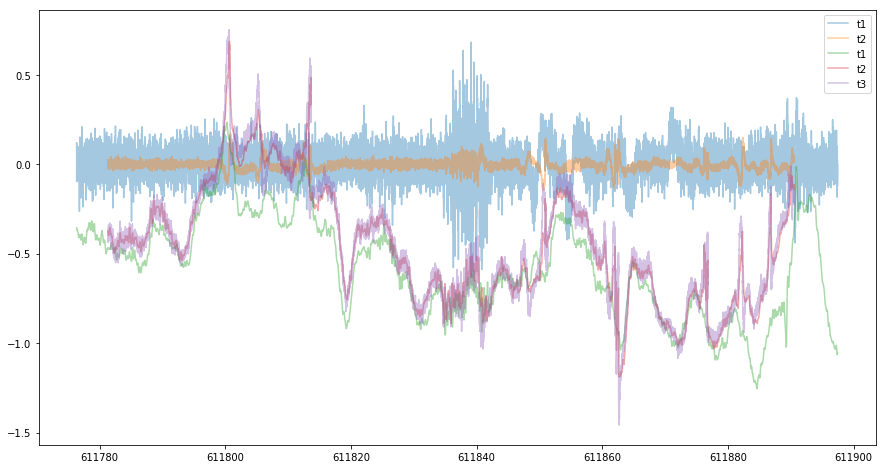

In [295]:
plt.figure(figsize=(15,8))
plt.plot(df0.utm_east[nh//2+90000:nh//2+90000+12000], df0.acc_robot_x[nh//2+90000:nh//2+90000+12000], alpha=0.4, label = 't1')
plt.plot(df.utm_east[nh//2+105000:nh//2+90000+30000], acc_d[nh//2+105000:nh//2+90000+30000]*5, alpha=0.4, label='t2')
plt.plot(df0.utm_east[nh//2+90000:nh//2+90000+12000], np.sin(df0.pitch)[nh//2+90000:nh//2+90000+12000]*50+2, alpha=0.4, label='t1')
plt.plot(df.utm_east[nh//2+105000:nh//2+90000+30000], np.sin(df.pitch)[nh//2+105000:nh//2+90000+30000]*50+2, alpha=0.4, label = 't2')
plt.plot(df.utm_east[nh//2+105000:nh//2+90000+30000], np.sin(df.pitch)[nh//2+105000:nh//2+90000+30000]*50+2-acc_d[nh//2+105000:nh//2+90000+30000]*10, alpha=0.4, label = 't3')
plt.legend()

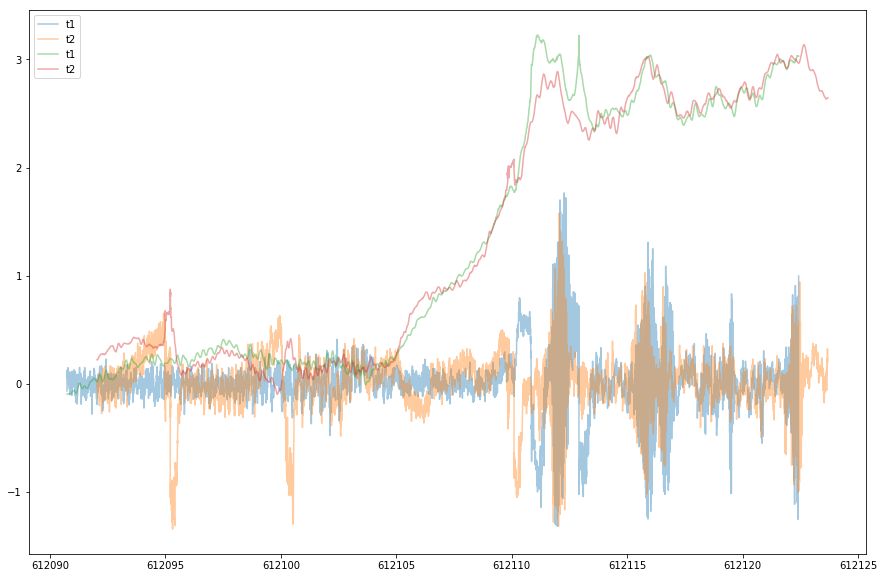

In [201]:
n_h=15000
plt.figure(figsize=(15,10))
plt.plot(df0.utm_east[:n_h//2-3000], df0.acc_robot_x[:n_h//2-3000], alpha=0.4, label = 't1')
plt.plot(df.utm_east[1500:n_h//2], df.acc_robot_x[1500:n_h//2], alpha=0.4, label='t2')
plt.plot(df0.utm_east[:n_h//2-3000], np.sin(df0.pitch)[:n_h//2-3000]*50+5, alpha=0.4, label='t1')
plt.plot(df.utm_east[1500:n_h//2], np.sin(df.pitch)[1500:n_h//2]*50+5, alpha=0.4, label = 't2')
plt.legend()

In [332]:
acc = gaussian_filter1d(df.acc_robot_x, 20)

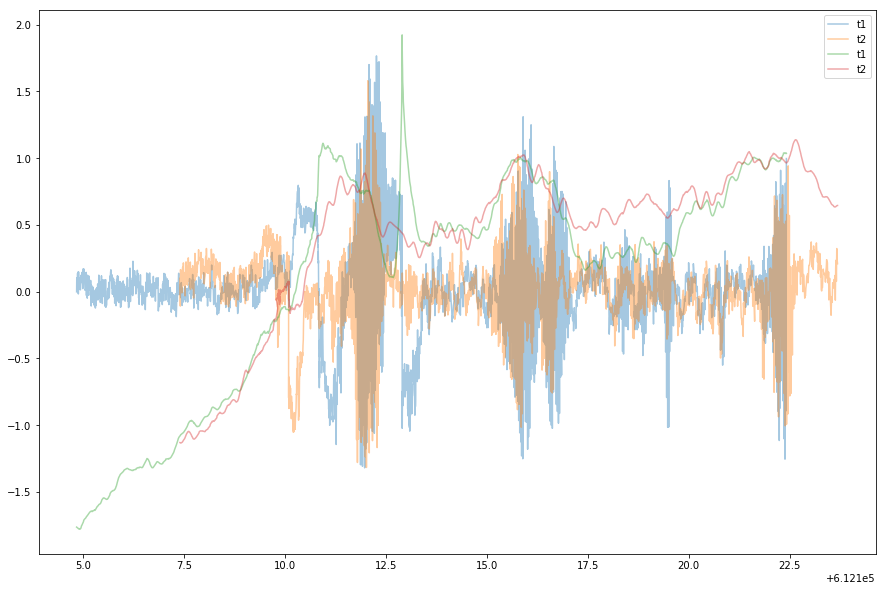

In [333]:
n_h=15000
plt.figure(figsize=(15,10))
plt.plot(df0.utm_east[:n_h//2-5000], df0.acc_robot_x[:n_h//2-5000], alpha=0.4, label = 't1')
plt.plot(df.utm_east[1500:n_h//2-3000], df.acc_robot_x[1500:n_h//2-3000], alpha=0.4, label='t2')
plt.plot(df0.utm_east[:n_h//2-5000], np.sin(df0.pitch)[:n_h//2-5000]*50+3-acc[:n_h//2-5000], alpha=0.4, label='t1')
plt.plot(df.utm_east[1500:n_h//2-3000], np.sin(df.pitch)[1500:n_h//2-3000]*50+3, alpha=0.4, label = 't2')
plt.legend()

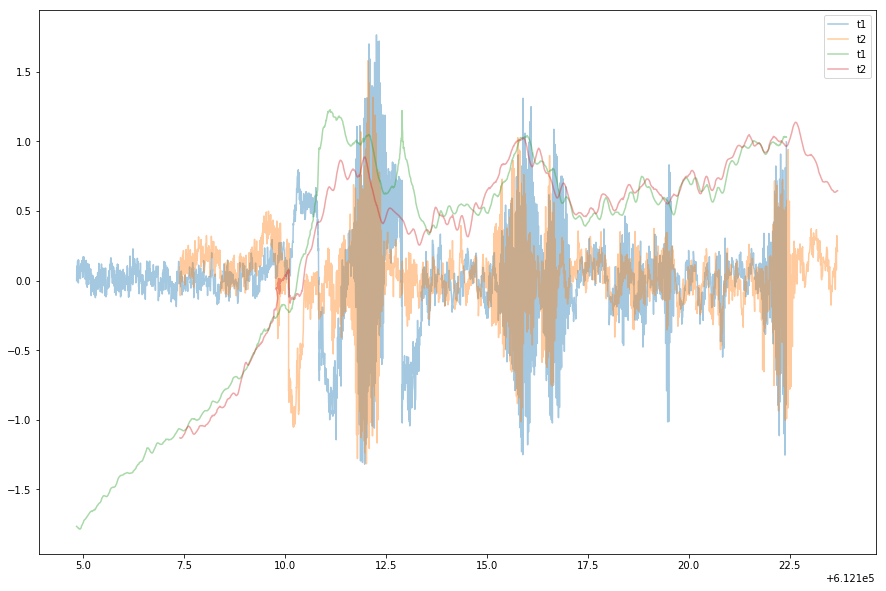

In [202]:
n_h=15000
plt.figure(figsize=(15,10))
plt.plot(df0.utm_east[:n_h//2-5000], df0.acc_robot_x[:n_h//2-5000], alpha=0.4, label = 't1')
plt.plot(df.utm_east[1500:n_h//2-3000], df.acc_robot_x[1500:n_h//2-3000], alpha=0.4, label='t2')
plt.plot(df0.utm_east[:n_h//2-5000], np.sin(df0.pitch)[:n_h//2-5000]*50+3, alpha=0.4, label='t1')
plt.plot(df.utm_east[1500:n_h//2-3000], np.sin(df.pitch)[1500:n_h//2-3000]*50+3, alpha=0.4, label = 't2')
plt.legend()

In [226]:
ns0 = 0 # starting
nh0 = np.array(df0.utm_east).argmin() # half
ne0 = np.where(df0.utm_east>df.utm_east[0])[0][0] - 1 # ending

n1_s = n_s
n1_e = n_h-7000
n2_s = n_h+3900
n2_e = n_e
n10 = list(range(n1_s, n1_e)) # idx of first half
n20 = list(range(n2_s, n2_e)) # idx of second half

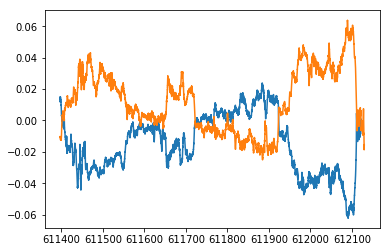

In [231]:
plt.plot(x0[n10], pitch0[n10])
plt.plot(x0[n20], pitch0[n20])

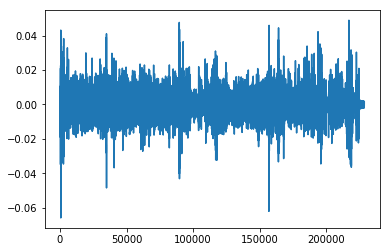

In [352]:
plt.plot(df.omega_pitch)

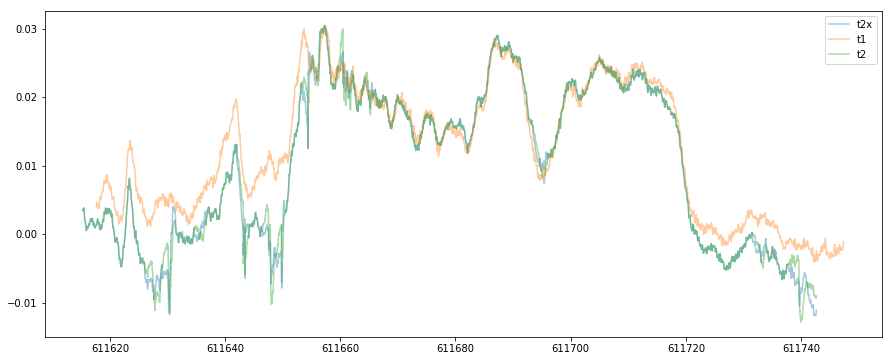

In [155]:
n_s=50000
n_h=60000
plt.figure(figsize=(15,6))
# plt.plot(x2[n_s-7000:n_h], acc2[n_s-7000:n_h], alpha=0.4, label = 't1')
# plt.plot(x3[n_s:n_h+9000], acc3[n_s:n_h+9000], alpha=0.4, label='t2')
# plt.plot(x2[n_s-7000:n_h], acc2[n_s-7000:n_h]-bias(acc2)[n_s-7000:n_h], alpha=0.4, label = 't1')
plt.plot(x3[n_s:n_h+9000], pitch3[n_s:n_h+9000]-bias(acc3)[n_s:n_h+9000], alpha=0.4, label='t2x')
plt.plot(x2[n_s-7000:n_h], pitch2[n_s-7000:n_h], alpha=0.4, label='t1')
plt.plot(x3[n_s:n_h+9000], pitch3[n_s:n_h+9000], alpha=0.4, label = 't2')
plt.legend()

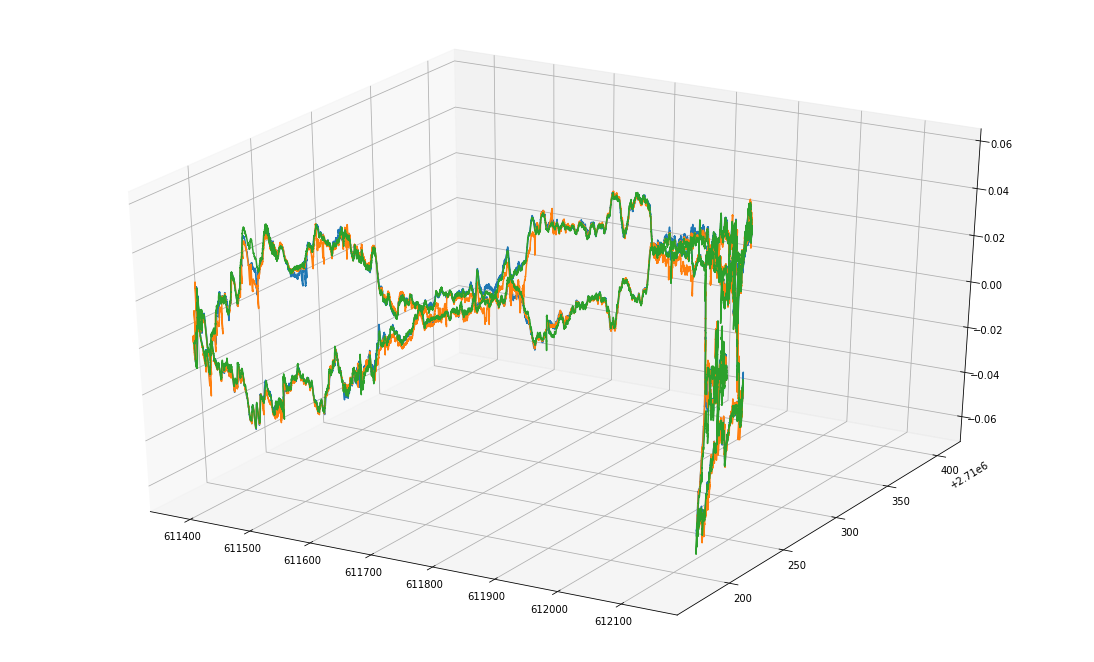

In [144]:
fig=plt.figure(figsize=(15,9))
ax = Axes3D(fig)
ax.plot(x2, y2, pitch2)
ax.plot(x3, y3, pitch3)
ax.plot(x4, y4, pitch4)

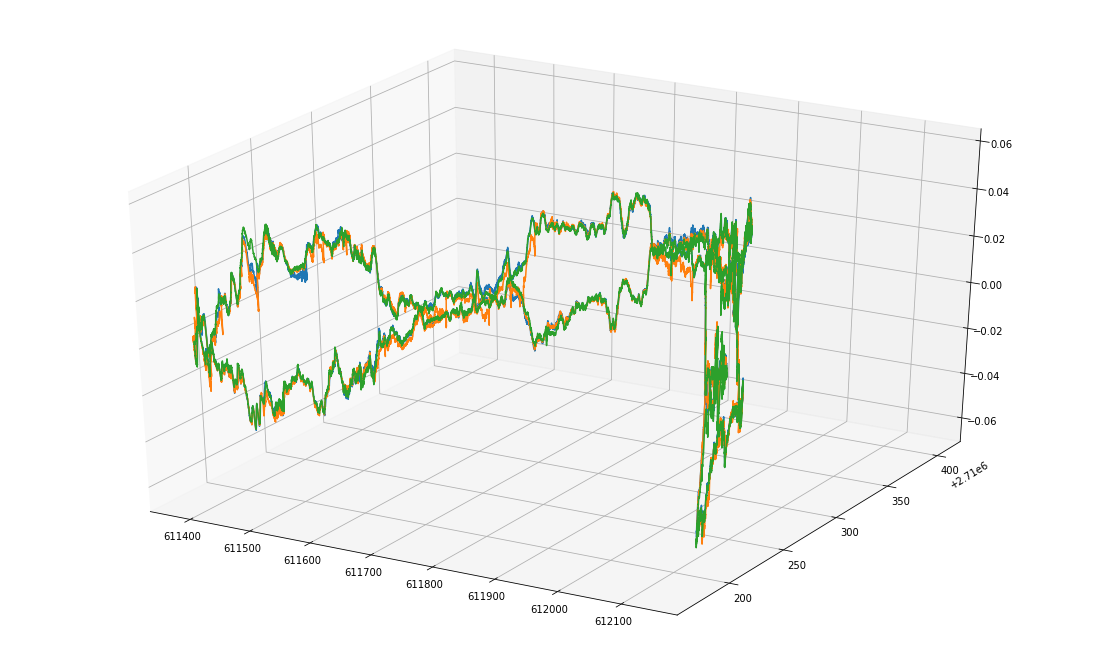

In [143]:
fig=plt.figure(figsize=(15,9))
ax = Axes3D(fig)
ax.plot(x2, y2, pitch2 - bias(acc2))
ax.plot(x3, y3, pitch3 - bias(acc3))
ax.plot(x4, y4, pitch4 - bias(acc4))

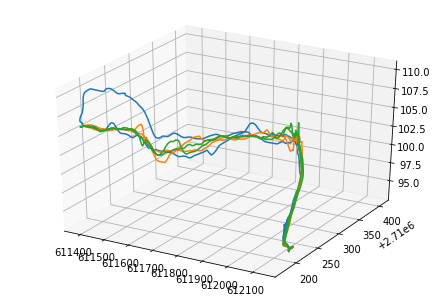

In [227]:
fig=plt.figure()
ax = Axes3D(fig)
ax.plot(x2, y2, MA(z2,1001))
ax.plot(x3, y3, MA(z3,1001))
ax.plot(x4, y4, MA(z4,1001))